#Preprocessing
Imports the data, processes it with the codebook and splits the collected surveys into individual files to be visualized seperately.

### package import

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import seaborn
import ipywidgets as widgets
from IPython.display import display
import textwrap
import sys
import subprocess
import re
import os

# List of directories to create
required_dirs = ['images', 'data', 'individual_surveys', 'pdf', 'stuff']

# Create directories if they don't exist
for dir_name in required_dirs:
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        print(f"Directory created: {dir_name}")
    else:
        print(f"Directory already exists: {dir_name}")



Directory already exists: images
Directory already exists: data
Directory already exists: individual_surveys
Directory already exists: pdf
Directory already exists: stuff


# Load the CSV file, CSV der Datenerhebung

### change the file path below to point to the csv file that was downloaded from socsci and contains the data from multiple surveys

In [42]:
file_path = 'data/data_kitegg-evaluation_2023-12-14_12-13.csv'
df = pd.read_csv(file_path, encoding='utf-16', delimiter='\t')

In [43]:
def ensure_dir(directory):
    """Ensures that a directory exists."""
    if not os.path.exists(directory):
        os.makedirs(directory)

# Update values with codebook.json

In [44]:
codebook_path = 'stuff/translations.json' #codebook json path
with open(codebook_path, 'r', encoding='utf-8') as file:
    translations = json.load(file)
for details in translations.values():
    source_column = details['source_column']
    target_column = details['target_column']
    # Check if the source column exists to avoid KeyError
    if source_column in df.columns:
        # Convert source column to string to ensure correct mapping
        df[source_column] = df[source_column].astype(str)
        # Prepare a mapping from source to translated values
        translation_map = details['translations']
        # Apply the mapping
        df[target_column] = df[source_column].map(translation_map).fillna(df[target_column])
    else:
        print(f"Warning: Column '{source_column}' not found in DataFrame.")

# Clean the data

In [45]:
# Remove unneccesary columns
columns_to_remove = ['CASE', 'SERIAL', 'REF'] 
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])
if 'TIME001' in df.columns:
    col_index = df.columns.get_loc('TIME001')
    # Keep only the columns to the left of 'TIME001'
    df = df.iloc[:, :col_index]

# Splitting the data from different surveys

### you will have a new folder called 'individual surveys' and it will contain seperate csv files each for every survey!

In [46]:
# Split the File into individual surveys by looking at the 'QUESTNNR' column
unique_surveys = df['QUESTNNR'].unique()

# Directory to save the split files
output_dir = 'individual_surveys'
os.makedirs(output_dir, exist_ok=True)

output_files = []
for survey in unique_surveys:
    # Filter the dataset for each survey
    survey_data = df[df['QUESTNNR'] == survey]
    
    # Safe file name (replace problematic characters)
    safe_survey_name = survey.replace('/', '_').replace('\\', '_').replace(':', '_')
    file_name = f"{safe_survey_name}.csv"  # Change file extension to .csv
    
    # Define the output file path
    output_file_path = os.path.join(output_dir, file_name)
    
    # Save each subset to a CSV file
    survey_data.to_csv(output_file_path, index=False, encoding='utf-8')  # Use to_csv for CSV output
    output_files.append(output_file_path)

# Print or return the list of output files
print(output_files)


['individual_surveys/Fragebogen, der im Interview verwendet wurde.csv', 'individual_surveys/ev_kisd_wise_23_24_NONSENSE.csv', 'individual_surveys/evluation_test.csv', 'individual_surveys/ev_kisd_TH_Augsburg_November_2023.csv', 'individual_surveys/Laborwoche_Schwaebisch_Gmuend_November23.csv', 'individual_surveys/ev_kisd_Fundamentals.csv', 'individual_surveys/SG_WS23_24_Sewig.csv']


# Creating file picker

In [7]:
import os
import ipywidgets as widgets
from IPython.display import display

folder_path = 'individual_surveys'
files = os.listdir(folder_path)

# Instruction label
#instruction = widgets.Label('Pick the specific survey to be evaluated from the dropdown:')
instruction = widgets.HTML(
    value='<span style="color: orange; font-weight: bold; font-size: 20pt;">Pick the specific survey to be evaluated from the dropdown:</span>',
)

# Define the dropdown widget with options
file_dropdown = widgets.Dropdown(
    options=files,
    description='Files:',
    disabled=False,
)

# Adjust the layout and style directly
file_dropdown.layout.width = '50%'  # Adjusting width to be more prominent
file_dropdown.style = {'description_width': 'initial'}  # Ensuring the description is not cut off

# Wrapping the instruction and dropdown in a VBox to display them together
box = widgets.VBox([instruction, file_dropdown])
box.layout.align_items = 'center'
box.layout.border = '10px solid orange'  # Adding a border to make the dropdown more prominent
box.layout.width = 'auto'
box.layout.margin = '10px'  # Adding margin around the box

display(box)


# Make Dataframe

In [47]:
selected_file = file_dropdown.value
selected_file_path = os.path.join(folder_path, selected_file)
df = pd.read_csv(selected_file_path, encoding='utf-8')  # Adjust encoding if necessary

# variables

In [48]:
selected_file = file_dropdown.value


semesters = df['A104'].replace([-9, -1], np.nan)
kompetenz_01 = df['B202_01'].replace([-9, -1], np.nan)
kompetenz_02 = df['B202_06'].replace([-9, -1], np.nan)
kompetenz_03 = df['B202_02'].replace([-9, -1], np.nan)
kompetenz_04 = df['B202_07'].replace([-9, -1], np.nan)
kompetenz_05 = df['B202_08'].replace([-9, -1], np.nan)
relevanz_01 = df['B210_01'].replace([-9, -1], np.nan)
relevanz_02 = df['B210_06'].replace([-9, -1], np.nan)
angemessenheit_01 = df['B207_01'].replace([-9, -1], np.nan)
freitext_response_01 = df['B204_01'].dropna()
kompetenz_allg_01 = df['B209_03'].replace([-9, -1], np.nan)
kompetenz_allg_02 = df['B209_04'].replace([-9, -1], np.nan)
kompetenz_allg_03 = df['B209_05'].replace([-9, -1], np.nan)
kompetenz_allg_04 = df['B209_06'].replace([-9, -1], np.nan)
freitext_response_02 = df['B206_01'].dropna()
pers_01 = df['B211_01'].replace([-9, -1], np.nan)
pers_02 = df['B211_02'].replace([-9, -1], np.nan)
pers_03 = df['B211_03'].replace([-9, -1], np.nan)
pers_04 = df['B211_04'].replace([-9, -1], np.nan)
arbeitsaufw_01 = df['B301_01'].replace([-9, -1], np.nan)
arbeitsaufw_02 = df['B301_02'].replace([-9, -1], np.nan)
arbeitsaufw_03 = df['B301_03'].replace([-9, -1], np.nan)
investierte_stunden = df['B303_01']
dozentin_01 = df['C101_01'].replace([-9, -1], np.nan)
dozentin_02 = df['C101_02'].replace([-9, -1], np.nan)
dozentin_03 = df['C101_03'].replace([-9, -1], np.nan)
dozentin_04 = df['C101_04'].replace([-9, -1], np.nan)
dozentin_05 = df['C101_05'].replace([-9, -1], np.nan)
dozentin_06 = df['C101_06'].replace([-9, -1], np.nan)
dozentin_07 = df['C101_07'].replace([-9, -1], np.nan)
freitext_response_C = df['C102_01'].dropna()

################## HEADLINES ###########################

kompetenz_headline = 'Durch die Teilnahme an der Veranstaltung...'
kompetenz_01_text_d = '...wurden meine Kenntnisse im Bereich KI erweitert'
kompetenz_01_text_e = '...I was able to extend my knowledge about Artificial Intelligence'
kompetenz_02_text_d = '...habe ich neue Sichtweisen zum Thema KI entwickelt'
kompetenz_02_text_e = '...I developed new views on the topic of AI'
kompetenz_03_text_d = '... hat sich mein grundlegendes Verständnis von KI verbessert'
kompetenz_03_text_e = '...my general understanding of AI was improved'
kompetenz_04_text_d = '... haben sich meine computerkentnisse verbessert'
kompetenz_04_text_e = '...my general understanding of computers was improved'
kompetenz_05_text_d = '... kann ich einen Bezug zu KI Themen und Gestaltung herstellen'
kompetenz_05_text_e = '... I can connect what I learned about AI to Design in general'
relevanz_headline = 'Die vermittelten Inhalte...'
relevanz_01_text_d = '...empfinde ich grundlegend als relevant und zeitgemäß'
relevanz_01_text_e = '...are relevant and timely'
relevanz_02_text_d = '....lassen sich auf andere Aspekte meines Studiums/Berufslebens übertragen'
relevanz_02_text_e = '...I can apply to my studies/work'
angemessenheit_01_text_d = '...Die im Kurs gestellten Aufgaben empfand ich als...'
angemessenheit_01_text_e = 'the tasks posed to me were appropriate'
freitext_frage_01 = 'Im Bezug auf KI haben mir folgende Themen gefehlt/ hätte mir die folgenden Inhalte gewünscht'
kompetenz_allg_headline = 'Durch die Teilnahme an der Veranstaltung...'
kompetenz_allg_01_text_d = '... habe ich gelernt, projektorientiert zu arbeiten: z. B. Selbst- und Arbeitsorganisation, Entwicklung von Zielen, Verlaufsplanung etc'
kompetenz_allg_01_text_e = '... habe ich gelernt, projektorientiert zu arbeiten: z. B. Selbst- und Arbeitsorganisation, Entwicklung von Zielen, Verlaufsplanung etc'
kompetenz_allg_02_text_d = '...  habe ich neue Arbeits- und Forschungsmethoden kennengelernt.'
kompetenz_allg_02_text_e = '...  habe ich neue Arbeits- und Forschungsmethoden kennengelernt.'
kompetenz_allg_03_text_d = '... habe ich meine Kompetenzen im Umgang mit designspezifischer/n Software, Geräten etc. verbessert.'
kompetenz_allg_03_text_e = '...habe ich meine Kompetenzen im Umgang mit designspezifischer/n Software, Geräten etc. verbessert.'
kompetenz_allg_04_text_d = '...habe ich meine Fähigkeit verbessert, konstruktiv in einer Gruppe zu arbeiten.'
kompetenz_allg_04_text_e = '...habe ich meine Fähigkeit verbessert, konstruktiv in einer Gruppe zu arbeiten.'
freitext_frage_02 = 'Folgendes hätte mir das Lernen erleichtert:'
pers_01_text_d = '...ich konnte meine persönlichen Erwartungen an mich in dem Kurs erfüllen'
pers_01_text_e = ''
pers_02_text_d = '...der Kurs hat zu meiner fachlichen Weiterentwicklung beigetragen'
pers_02_text_e = '...der Kurs hat zu meiner fachlichen Weiterentwicklung beigetragen'
pers_03_text_d = '...im Themenbereich KI fühle ich mich jetzt sicherer'
pers_03_text_e = ''
pers_04_text_d = '...ich habe neue Anregungen und Inspiration gewonnen'
pers_04_text_e = '...ich habe neue Anregungen und Inspiration gewonnen'
arbeitsaufw_01_text_d = ' ...empfand ich als angemessen.'
arbeitsaufw_01_text_e = '... was appropriate'
arbeitsaufw_02_text_d = '...ist mit dem Arbeitsaufwand für ähnliche Veranstaltungen, die ich besucht habe, vergleichbar.'
arbeitsaufw_02_text_e = ''
arbeitsaufw_03_text_d = 'Insgesamt konnte ich den Arbeitsaufwand zeitlich gut bewältigen.'
arbeitsaufw_03_text_e = ''
dozentin_01_text_d = '... führte die Veranstaltung sehr engagiert durch.'
dozentin_01_text_e = ''
dozentin_02_text_d = '...ging auf Fragen und Anregungen der Studierenden angemessen ein'
dozentin_02_text_e = ''
dozentin_03_text_d = '...schaffte ein konstruktives und offenes Arbeitsklima.'
dozentin_03_text_e = ''
dozentin_04_text_d = '...betreute die Einzelarbeiten der Teilnehmenden und/oder Kleingruppen sehr gut.'
dozentin_04_text_e = ''
dozentin_05_text_d = '...war stets gut vorbereitet'
dozentin_05_text_e = ''
dozentin_06_text_d = '...ist auf individuelle Bedürfnisse geingegangen'
dozentin_06_text_e = ''
dozentin_07_text_d = '... hat den Bezug von KI und dem Studium im Bereich Gestaltung stets plausibel hergestellt'
dozentin_07_text_e = ''
freitext_frage_C = 'Folgendes hätte ich mir von meiner Dozentin/ meinem Dozenten noch gewünscht // Folgendes kann er/sie noch besser machen:'


# Functions

### stacked bar chart function

In [49]:
def stackedbarchart(section):
    global latex_code
    # Preprocessing
    df.rename(columns={'A103_05': 'Hochschule'}, inplace=True)
    value_counts = df['Hochschule'].value_counts(normalize=True) * 100
    value_counts.sort_index(inplace=True)
    
    # Ensure directory exists
    section_name = section.replace(" ", "_")
    ensure_dir(f"images/{section_name}")
    
    # Setup plot with adjusted size ratios
    fig, (bar_ax, legend_ax) = plt.subplots(1, 2, figsize=(10, 2.5), gridspec_kw={'width_ratios': [1, 3]})
    colormap = plt.get_cmap('Pastel1')
    colors = [colormap(i) for i in np.linspace(0, 1, len(value_counts))]
    hatch_patterns = ['//////', '\\\\\\', '||||||', '------', '++++++', 'xxxxxx', 'oooooo', 'OO00OO', '......', '*****']
    bottom = 0
    
    # Collect bar segments for the legend
    bar_segments = []
    for (label, value), hatch, color in zip(value_counts.items(), hatch_patterns, colors):
        bar_segment = bar_ax.bar('Hochschule', value, bottom=bottom, hatch=hatch, edgecolor='black', color=color)
        bar_segments.append(bar_segment[0])  # Append the actual bar object
        bottom += value
    
    # Configure bar chart
    bar_ax.set_ylim(0, 100)
    bar_ax.set_ylabel('Anteil der Studierenden', fontsize=14)
    bar_ax.set_xticks([])
    bar_ax.set_title("Verteilung", fontsize=12)
    bar_ax.axis('off')
    
    # Legend in a separate axis
    legend_ax.axis('off')  # Turn off axes for the legend plot
    legend_labels = [f"{label} ({value:.1f}%)" for label, value in value_counts.items()]
    legend_ax.legend(bar_segments, legend_labels, title="Hochschule", loc='center', fontsize=12, title_fontsize=12)  # Increased font sizes

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    image_path = f"images/{section_name}/stackedbarchart.png"
    plt.savefig(image_path, bbox_inches='tight')
    plt.close()
    
    # Add to LaTeX code
    latex_code.append(f"\\begin{{center}}\\includegraphics[width=0.9\\textwidth]{{{image_path}}}\\end{{center}}")


### freitext function

In [50]:
def freitext(frage, responses):
    global latex_code
    
    # Render in Jupyter Notebook
    fig_height = max(2, len(responses) * 0.3)  # Determine figure height dynamically
    fig, ax = plt.subplots(figsize=(13, fig_height))
    
    ax.axis('off')  # Hide axes for a clean look

    # Format text for rendering in the notebook
    text_str = "\n\n".join(f"{idx+1}. {resp}" for idx, resp in enumerate(responses))
    ax.text(0, 1, text_str, ha='left', va='top', wrap=True, fontsize=12, transform=ax.transAxes)

    # Title for the notebook rendering
    ax.set_title(frage, fontsize=12, fontweight='bold', pad=20, loc='left')
    plt.show()

    # Format responses for LaTeX
    formatted_responses = "\\begin{itemize}\n"
    for idx, response in enumerate(responses, 1):
        formatted_responses += f"    \\item {response}\n"
    formatted_responses += "\\end{itemize}"

    # Append the LaTeX code for the freitext section
    latex_code.append(f"\\subsection*{{{frage}}}\n{formatted_responses}")


### likert scale function

In [51]:
def likert01(data, question_text_d, question_text_e, headline=None, section="default_section"):
    """
    Generates a Likert chart and saves it as an image with a filename based on the question text.

    Args:
        data: Data for the chart.
        question_text_d: Question text in German.
        question_text_e: Question text in English.
        headline: Headline for the chart.
        section: Section name to organize files.
    """
    global latex_code

    # Ensure directory exists for the section
    section_name = section.replace(" ", "_")
    ensure_dir(f"images/{section_name}")
    
    # Preprocessing
    hatch_pattern = '\\\\\\\\'
    non_respondents_count = data.isna().sum()
    valid_data = pd.to_numeric(data.dropna(), errors='coerce')
    scale_counts = valid_data.value_counts().reindex(range(1, 6), fill_value=0)
    percentages = (scale_counts / len(valid_data) * 100).tolist()
    
    # Statistics
    av = np.mean(valid_data)
    md = np.median(valid_data)
    dev = np.std(valid_data, ddof=1)

    # Plot configuration
    fig_width = 15  # Increased figure width for more space
    fig_height = 4  # Adjusted height
    width_ratios = [3, 6]  # Adjusted ratios for better space allocation
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': width_ratios}, figsize=(fig_width, fig_height))
    
    # Left Text Box
    wrapped_text_d = textwrap.fill(question_text_d, width=50)  # Increased text wrapping width
    axs[0].text(0.5, 0.5, wrapped_text_d, ha='center', va='center', fontsize=16, wrap=True)
    axs[0].axis('off')  # Hide axes for the text box
    
    # Middle Bar Chart
    axs[1].bar(range(1, 6), percentages, color='lightgrey', edgecolor='black', hatch=hatch_pattern)
    axs[1].set_xticks(range(1, 6))
    axs[1].set_xticklabels(['5', '4', '3', '2', '1'], fontsize=14)  # Larger x-axis labels
    axs[1].set_ylabel('%', fontsize=14)  # Larger y-axis label
    axs[1].set_ylim(0, max(percentages) * 1.3)
    
    for i, v in enumerate(percentages):
        axs[1].text(i + 1, v + 1, f"{v:.1f}%", ha='center', fontsize=12)  # Larger percentage text
    
    axs[1].axvline(x=av, color='darkred', linewidth=2, label=f'Average ({av:.1f})', zorder=3)
    axs[1].axvline(x=av-dev, color='orange', linestyle='--', linewidth=2, label=f'Std. Dev. ({dev:.1f})', zorder=3)
    axs[1].axvline(x=av+dev, color='orange', linestyle='--', linewidth=2, zorder=3)
    
    # Add Median Indicator (Blue Triangle)
    axs[1].plot(md, -2, '^', color='blue', markersize=10, label=f'Median ({md:.1f})', clip_on=False, zorder=4)
    axs[1].legend(fontsize=12)  # Larger legend font size
    
    # Add headline to the figure if provided
    if headline:
        fig.suptitle(headline, fontsize=20, fontweight='bold', x=0.05, ha='left')

    # Tight layout with adjustments for text
    plt.tight_layout(pad=3)

    # Generate a unique filename based on the question text
    sanitized_question = textwrap.shorten(question_text_d, width=50).replace(" ", "_").replace(".", "").replace(",", "").replace("/", "").replace("?", "").replace(":", "").replace("'", "")
    image_path = f"images/{section_name}/likert_{sanitized_question}.png"
    
    # Save the figure
    plt.savefig(image_path, bbox_inches='tight')
    plt.close()
    
    # Add LaTeX code with the unique filename
    latex_code.append(f"\\begin{{center}}\\includegraphics[width=0.9\\textwidth]{{{image_path}}}\\end{{center}}")


### bar chart function

In [52]:
def barchart(data, headline_text, section="default_section"):
    global latex_code
    
    # Ensure directory exists for the section
    section_name = section.replace(" ", "_")
    ensure_dir(f"images/{section_name}")
    
    # Assuming 'data' is a pandas Series with the pre-binned responses as strings, including special categories.
    ordered_categories = ['1-2', '3-4', '5-6', '6-7', '7+', 'höheres Semester', 'keine Angabe']
    
    # Count occurrences of each bin/category
    data_counts = data.value_counts().reindex(ordered_categories, fill_value=0)
    total_responses = data_counts.sum()
    percentages = (data_counts / total_responses * 100).round(1)
    
    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(8, 2))  # Full-width chart
    color = 'lightgrey'
    edge_color = 'black'
    hatch_pattern = '////'
    bars = ax.bar(ordered_categories, data_counts, color=color, edgecolor=edge_color, hatch=hatch_pattern)
    
    # Add percentages on top of the bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        ax.annotate(f'{percentage}%', (bar.get_x() + bar.get_width() / 2, height), 
                    textcoords="offset points", xytext=(0, 5), ha='center', va='bottom')

    # Turn off axes
    ax.axis('off')  # Completely removes the axes

    plt.tight_layout()
    
    # Save the plot
    image_path = f"images/{section_name}/barchart_{headline_text.replace(' ', '_')}.png"
    plt.savefig(image_path, bbox_inches='tight')
    plt.close()
    
    # Add to LaTeX code
    latex_code.append(f"\\begin{{center}}\\includegraphics[width=1\\textwidth]{{{image_path}}}\\end{{center}}")


### histogram function

In [53]:
def histo(data, name="histo", section="default_section"):
    global latex_code
    
    # Ensure directory exists for the section
    section_name = section.replace(" ", "_")
    ensure_dir(f"images/{section_name}")
    
    hatch_pattern = '\\\\\\\\'  # Hatch pattern for the bars
    
    # Preprocess data
    non_respondents_count = data.isna().sum()
    valid_data = pd.to_numeric(data.dropna(), errors='coerce')
    
    # Set up plot
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(8, 3))
    
    # Histogram for valid data
    axs[0].hist(valid_data, bins=30, color='lightgrey', edgecolor='black', hatch=hatch_pattern)
    axs[0].set_title('Verteilung des Zeitaufwands')
    axs[0].set_xlabel('Stunden')
    axs[0].set_ylabel('Häufigkeit')
    
    # Display total responses and non-responses
    response_info = f'Antworten: {len(valid_data)}\nKeine Antwort: {non_respondents_count}'
    axs[1].text(0.5, 0.5, response_info, ha='center', va='center', fontsize=12)
    axs[1].axis('off')
    
    # Calculate and format the average
    durchschnitt_german_style = "{:.1f}".format(np.mean(valid_data)).replace('.', ',')
    
    # Display average time spent at the bottom of the figure
    fig.text(0.5, 0.01, f"Die Studierenden verbrachten im Schnitt {durchschnitt_german_style} Stunden pro Woche mit der Vor- und Nachbereitung für die Veranstaltung", ha='center', fontsize=10, fontweight='bold')
    
    plt.subplots_adjust(bottom=0.2)  # Adjust layout

    # Save the figure
    image_path = f"images/{section_name}/{name}.png"
    plt.savefig(image_path)
    plt.close()
    
    # Add LaTeX code
    latex_code.append(f"\\begin{{center}}\\includegraphics[width=1\\textwidth]{{{image_path}}}\\end{{center}}")

    plt.show()


### headlines function

In [54]:
def headline(headline_text: str, fontsize: int = 14, section: str = "default_section") -> None:
    """
    Generates a headline for the LaTeX document and renders it in the Jupyter Notebook.
    
    Args:
        headline_text (str): The text of the headline.
        fontsize (int): The font size of the headline.
        section (str): Section name for directory creation (optional).
    """
    global latex_code

    # Ensure directory exists for the section
    def ensure_dir(directory):
        """Ensures that a directory exists."""
        if not os.path.exists(directory):
            os.makedirs(directory)

    section_name = section.replace(" ", "_")
    ensure_dir(f"images/{section_name}")
    
    # Render the headline in the notebook
    fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figure size as needed
    ax.set_axis_off()
    ax.text(0.5, 0.5, headline_text, fontsize=fontsize, fontweight='bold', ha='center', va='center', transform=ax.transAxes)
    plt.tight_layout()
    plt.show()
    
    # Add LaTeX code for the headline (with larger size and underlined text)
    latex_code.append(f"\\section*{{\\underline{{\\Large {headline_text}}}}}")


def h1(headline_text: str) -> None:
    """
    Generates a larger, underlined headline (h1) for the LaTeX document.
    
    Args:
        headline_text (str): The text of the headline.
    """
    global latex_code
    
    # Add LaTeX code for the h1 headline
    latex_code.append(f"\\section*{{\\underline{{\\Large {headline_text}}}}}")

def h2(headline_text: str) -> None:
    """
    Generates a smaller, regular headline (h2) for the LaTeX document.
    
    Args:
        headline_text (str): The text of the headline.
    """
    global latex_code
    
    # Add LaTeX code for the h2 headline
    latex_code.append(f"\\subsection*{{\\normalsize \\textbf{{{headline_text}}}}}")



# Latex function

In [55]:
import re

# Define latex_code globally
global latex_code
latex_code = []

# Retrieve the dropdown value
document_title = file_dropdown.value[:-4] if 'file_dropdown' in globals() else "Default_Title"

# Print for verification
print(f"Document Title: {document_title}")

# Retrieve start and end times
started_time = df['STARTED'].iloc[0]  # First row value of 'STARTED'
ended_time = df['STARTED'].iloc[-1]   # Last row value of 'STARTED'

# Store as variables to include in LaTeX
start_latex = f"Started: {started_time}"
end_latex = f"Ended: {ended_time}"

# Function to save LaTeX
def save_latex(additional_packages: list = None, title: str = ""):
    """
    Saves the LaTeX document to a file with improved styling and dynamic title.

    Args:
        additional_packages (list): A list of additional LaTeX packages to include (optional).
        title (str): The title of the document.
    """
    global latex_code  # Ensure latex_code is global
    
    # Process title for filename (replace spaces with underscores)
    sanitized_title_for_filename = re.sub(r'[^\w\s-]', '', title).strip().replace(' ', '_')
    latex_filename = f"{sanitized_title_for_filename}.tex"
    pdf_filename = f"{sanitized_title_for_filename}.pdf"
    
    # Process title for document (preserve spaces, remove LaTeX special characters)
    sanitized_title_for_document = re.sub(r'[^\w\s-]', '', title).strip().replace('_', ' ')
    
    # Default packages
    latex_header = [
        "\\documentclass[12pt]{article}",
        "\\usepackage{graphicx}",
        "\\usepackage{geometry}",
        "\\geometry{a4paper, margin=1in}",
        "\\setlength\\parindent{0pt}",  # Remove paragraph indentation
        "\\usepackage{titling}"  # For custom title placement
    ]
    
    # Add additional packages if provided
    if additional_packages:
        for package in additional_packages:
            latex_header.append(f"\\usepackage{{{package}}}")
    
    # Write LaTeX document
    with open(latex_filename, 'w', encoding='utf-8') as f:
        # Write LaTeX header
        f.write("\n".join(latex_header) + "\n")
        f.write("\\begin{document}\n")
        
        # Add the title section with Started and Ended times
        f.write("\\begin{center}\n")
        f.write(f"\\huge \\textbf{{{sanitized_title_for_document}}}\\\\[1em]\n")  # Title in large bold font
        f.write(f"\\large {start_latex}\\\\[0.5em]\n")  # Started time
        f.write(f"\\large {end_latex}\\\\[0.5em]\n")  # Ended time
        f.write("\\end{center}\n")
        f.write("\\vspace{1cm}\n")  # Add some vertical space after the title
        
        # Write the content
        f.write("\n".join(latex_code) + "\n")
        f.write("\\end{document}\n")
    
    return latex_filename, pdf_filename

# Example: Dynamically set the document title
latex_filename, pdf_filename = save_latex(title=document_title)

# Compile the LaTeX file to PDF
#output_pdf = compile_latex_to_pdf(latex_filename)

# Display the generated PDF in Jupyter
#from IPython.display import display, FileLink
#display(FileLink(output_pdf))  # Adds a download link to the PDF


Document Title: ev_kisd_TH_Augsburg_November_2023


In [56]:
def compile_latex_to_pdf(latex_file, output_dir="pdf"):
    """
    Compiles a LaTeX file into a PDF and cleans up auxiliary files.

    Args:
        latex_file (str): Path to the .tex file.
        output_dir (str): Directory to save the compiled PDF.

    Returns:
        str: Path to the compiled PDF file.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Run pdflatex
    command = [
        "pdflatex",
        "-interaction=nonstopmode",  # Prevents user interaction for errors
        f"-output-directory={output_dir}",
        latex_file
    ]
    
    try:
        result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(result.stdout.decode())  # Print LaTeX log for debugging if needed
    except subprocess.CalledProcessError as e:
        print(e.stderr.decode())  # Print errors if compilation fails
        raise RuntimeError(f"LaTeX compilation failed.")
    
    # Move the PDF to the output directory and cleanup auxiliary files
    pdf_file = os.path.join(output_dir, os.path.splitext(os.path.basename(latex_file))[0] + ".pdf")
    if not os.path.exists(pdf_file):
        raise RuntimeError(f"PDF was not created: {pdf_file}")
    
    # Delete auxiliary files
    aux_files = [f for f in os.listdir(output_dir) if f.endswith(('.aux', '.log', '.tex'))]
    for aux_file in aux_files:
        os.remove(os.path.join(output_dir, aux_file))
    
    print(f"PDF generated successfully: {pdf_file}")
    return pdf_file

# Save the LaTeX file
latex_filename, pdf_filename = save_latex(title=document_title)

# Compile the LaTeX file to PDF and clean up
output_pdf = compile_latex_to_pdf(latex_filename)

# Display the generated PDF
#from IPython.display import display, FileLink
#display(FileLink(output_pdf))  # Adds a download link to the PDF


This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./ev_kisd_TH_Augsburg_November_2023.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size12.clo))
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/pdftex.def)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/gene

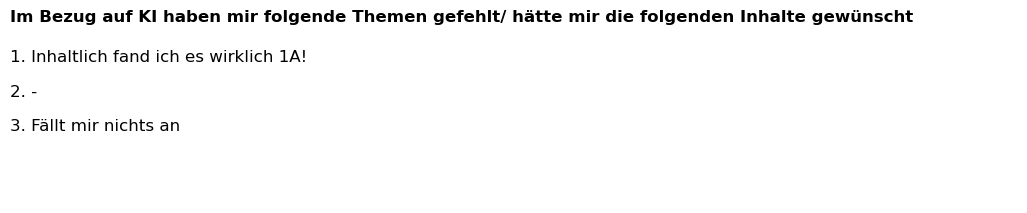

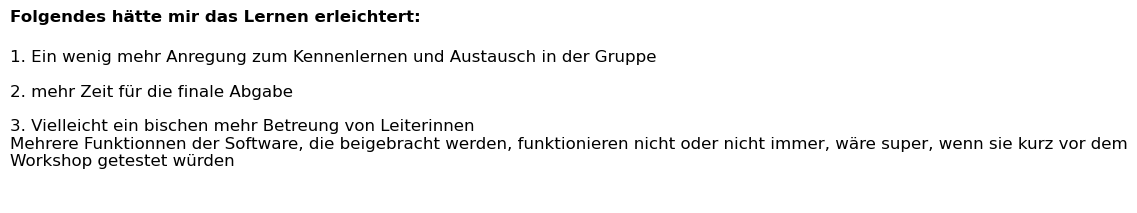

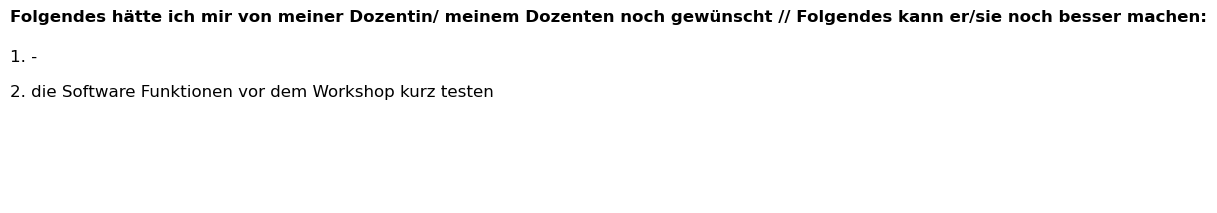

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./ev_kisd_TH_Augsburg_November_2023.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size12.clo))
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/pdftex.def)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/gene

/home/lauhp/001_WORK/2024_Sosci_visualisierung_NEU/pdf/ev_kisd_TH_Augsburg_November_2023.pdf

In [57]:
# Ensure latex_code is global
global latex_code
latex_code = []


# Section 1: Verteilung der Studierenden
h2('Verteilung der Studierenden nach Hochschule')
stackedbarchart("Verteilung der Studierenden nach Hochschule")

h2('Verteilung der Studierenden nach Semester')
barchart(semesters, "Verteilung der Studierenden nach Semester")

# Section 2: Kompetenzerwerb im Bezug auf KI
h1('Kompetenzerwerb im Bezug auf KI')
h2(kompetenz_headline)
likert01(kompetenz_01, kompetenz_01_text_d, kompetenz_01_text_e, section="Kompetenzerwerb")
likert01(kompetenz_02, kompetenz_02_text_d, kompetenz_02_text_e, section="Kompetenzerwerb")
likert01(kompetenz_03, kompetenz_03_text_d, kompetenz_03_text_e, section="Kompetenzerwerb")
likert01(kompetenz_04, kompetenz_04_text_d, kompetenz_04_text_e, section="Kompetenzerwerb")
likert01(kompetenz_05, kompetenz_05_text_d, kompetenz_05_text_e, section="Kompetenzerwerb")

# Section 3: Relevanz
h1('Relevanz')
h2(relevanz_headline)
likert01(relevanz_01, relevanz_01_text_d, relevanz_01_text_e, section="Relevanz")
likert01(relevanz_02, relevanz_02_text_d, relevanz_02_text_e, section="Relevanz")

# Section 4: Angemessenhet
h1('Angemessenheit')
likert01(angemessenheit_01, angemessenheit_01_text_d, angemessenheit_01_text_e, section="Angemessenheit")

# Section 5: Freitext Frage 01
freitext(freitext_frage_01, freitext_response_01)

# Section 6: Kompetenzerwerb Allgemein
h2('Kompetenzerwerb allgemein')
likert01(kompetenz_allg_01, kompetenz_allg_01_text_d, kompetenz_allg_01_text_e, section="Kompetenzerwerb_allgemein")
likert01(kompetenz_allg_02, kompetenz_allg_02_text_d, kompetenz_allg_02_text_e, section="Kompetenzerwerb_allgemein")
likert01(kompetenz_allg_03, kompetenz_allg_03_text_d, kompetenz_allg_03_text_e, section="Kompetenzerwerb_allgemein")
likert01(kompetenz_allg_04, kompetenz_allg_04_text_d, kompetenz_allg_04_text_e, section="Kompetenzerwerb_allgemein")

# Section 7: Freitext Frage 02
freitext(freitext_frage_02, freitext_response_02)

# Section 8: Persönliche Entwicklung
h1('Persönliche Entwicklung')
likert01(pers_01, pers_01_text_d, pers_01_text_e, section="Persoenliche_Entwicklung")
likert01(pers_02, pers_02_text_d, pers_02_text_e, section="Persoenliche_Entwicklung")
likert01(pers_03, pers_03_text_d, pers_03_text_e, section="Persoenliche_Entwicklung")
likert01(pers_04, pers_04_text_d, pers_04_text_e, section="Persoenliche_Entwicklung")

# Section 9: Arbeitsaufwand
h1('Arbeitsaufwand')
likert01(arbeitsaufw_01, arbeitsaufw_01_text_d, arbeitsaufw_01_text_e, section="Arbeitsaufwand")
likert01(arbeitsaufw_02, arbeitsaufw_02_text_d, arbeitsaufw_02_text_e, section="Arbeitsaufwand")
likert01(arbeitsaufw_03, arbeitsaufw_03_text_d, arbeitsaufw_03_text_e, section="Arbeitsaufwand")
h2('Im Durchschnitt investierte Stunden pro Woche (außerhalb der Veranstaltung)')
histo(investierte_stunden, name="Investierte_Stunden", section="Arbeitsaufwand")

# Section 10: Feedback
h1('Feedback zu dem/der Dozierenden')
likert01(dozentin_01, dozentin_01_text_d, dozentin_01_text_e, section="Feedback")
likert01(dozentin_02, dozentin_02_text_d, dozentin_02_text_e, section="Feedback")
likert01(dozentin_03, dozentin_03_text_d, dozentin_03_text_e, section="Feedback")
likert01(dozentin_04, dozentin_04_text_d, dozentin_04_text_e, section="Feedback")
likert01(dozentin_05, dozentin_05_text_d, dozentin_05_text_e, section="Feedback")
likert01(dozentin_06, dozentin_06_text_d, dozentin_06_text_e, section="Feedback")
likert01(dozentin_07, dozentin_07_text_d, dozentin_07_text_e, section="Feedback")

# Section 11: Freitext Dozent Feedback
freitext(freitext_frage_C, freitext_response_C)

# Save the LaTeX file and dynamically set the filename
latex_filename, pdf_filename = save_latex(title=document_title)

# Compile the LaTeX file to PDF
output_pdf = compile_latex_to_pdf(latex_filename)

# Display the generated PDF
from IPython.display import display, FileLink
display(FileLink(output_pdf))  # Adds a download link to the PDF
